# Rent the Runway Fit Data & Reviews

The original json file was found on the UCSD machine learning repository. 
http://cseweb.ucsd.edu/~jmcauley/datasets.html

### Import Libraries and Data

In [1]:
#Data cleaning
import json
import numpy as np
import pandas as pd

In [2]:
#Function to get the json file 
def get_json(filepath):
    with open(filepath, 'r') as fp:
        return json.load(fp)

In [3]:
data = []

with open('./data/renttherunway_final_data.json') as f:
    for line in f:
        data.append(json.loads(line))

In [4]:
#Check the data 
data[1]

{'fit': 'fit',
 'user_id': '273551',
 'bust size': '34b',
 'item_id': '153475',
 'weight': '132lbs',
 'rating': '10',
 'rented for': 'other',
 'review_text': 'I rented this dress for a photo shoot. The theme was "Hollywood Glam and Big Beautiful Hats". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event. ',
 'body type': 'straight & narrow',
 'review_summary': 'I felt so glamourous!!!',
 'category': 'gown',
 'height': '5\' 6"',
 'size': 12,
 'age': '36',
 'review_date': 'June 18, 2013'}

In [5]:
df = pd.DataFrame(data)
df.head()

,age,body type,bust size,category,fit,height,item_id,rating,rented for,review_date,review_summary,review_text,size,user_id,weight
0,28,hourglass,34d,romper,fit,"5' 8""",2260466,10,vacation,"April 20, 2016",So many compliments!,An adorable romper! Belt and zipper were a lit...,14,420272,137lbs
1,36,straight & narrow,34b,gown,fit,"5' 6""",153475,10,other,"June 18, 2013",I felt so glamourous!!!,I rented this dress for a photo shoot. The the...,12,273551,132lbs
2,116,NaN,NaN,sheath,fit,"5' 4""",1063761,10,party,"December 14, 2015",It was a great time to celebrate the (almost) ...,This hugged in all the right places! It was a ...,4,360448,NaN
3,34,pear,34c,dress,fit,"5' 5""",126335,8,formal affair,"February 12, 2014",Dress arrived on time and in perfect condition.,I rented this for my company's black tie award...,8,909926,135lbs
4,27,athletic,34b,gown,fit,"5' 9""",616682,10,wedding,"September 26, 2016",Was in love with this dress !!!,I have always been petite in my upper body and...,12,151944,145lbs


In [6]:
# df.to_csv('original_rent_the_runway.csv', index=False)

In [7]:
df.shape

(192544, 15)

# Clean the Data 

In [8]:
def clean_data(df):
    
    #Drop the null values 
    df.dropna(inplace=True)
    
    #remove text from weight
    df['weight'] = df['weight'].str.replace('lbs', '')
    
    #Remove space and punctuation from height string
    df['height'] = df['height'].str.replace(" ",'')
    df['height'] = df['height'].str.replace("\"",'')
    df['height'] = df['height'].str.replace("'", ".")
    
    #Convert height to float in inches  
    def convert_height(height):
        height = height.split(".")
        feet = float(height[0])
        inches = float(height[1])
        return (12*feet) +inches
    
    #Apply function to the entire height column 
    df['height'] = df['height'].apply(lambda x:convert_height(x))
    
    #Change column names to have underscores 
    df = df.rename(columns={'body type': 'body_type', 'bust size':'bust_size', 'rented for':'rented_for'})
    
    #Change to numeric dtypes
    df[['age', 'rating', 'item_id', 'size', 'user_id', 'weight']] = df[['age', 'rating', 'item_id', 'size', 'user_id', 'weight']].apply(pd.to_numeric)
    
    #Clean the age range to be between 10 and 100 
    age_mask = (df['age'] >= 10) & (df['age'] <= 100)
    df = df[age_mask]
    
    #Change date to correct dtpye
    df['review_date'] = pd.to_datetime(df['review_date'])
    
    
    #Make the fit column numeric in preparation for modeling 
    df['fit'] = df['fit'].map({"fit":1, 'small': 0, 'large': 2})
    
    return df


In [9]:
df = clean_data(df)

In [10]:
#Clean the category column 

df['category'].replace('culotte', 'culottes', inplace=True)
df['category'].replace('t-shirt', 'tee', inplace=True)
df['category'].replace('ballgown', 'gown', inplace=True)
df['category'].replace('legging', 'leggings', inplace=True)
df['category'].replace('pant', 'pants', inplace=True)
df['category'].replace('trouser', 'trousers', inplace=True)
df['category'].replace('blouson', 'blouse', inplace=True)
df['category'].replace('sweatershirt', 'sweatshirt', inplace=True)

#Remove the "for" category(it was probably misrecorded )
df = df[df['category'] != 'for']

In [11]:
df = df[df['category'] != 'for']

In [12]:
 # Since I have so much data, I will take a small sample of it for modeling purposes so my computer can handle the modeling
sample_df = df.sample(frac=0.2, replace=False, random_state=42)

In [13]:
#Data for the demo 
demo_df = df.sample(frac=0.0001, replace=False, random_state=42)

In [14]:
demo_df.head()

,age,body_type,bust_size,category,fit,height,item_id,rating,rented_for,review_date,review_summary,review_text,size,user_id,weight
33416,25,pear,34c,gown,0,65.0,937638,8,formal affair,2017-01-29,"Colorful, unique dress for a formal event",I'm glad I got the backup size of 10 because i...,20,402340,145
140398,26,hourglass,32b,gown,1,66.0,604383,10,formal affair,2016-10-27,Stylist Review,You can't help but feel powerful in this numbe...,24,380920,160
179426,38,straight & narrow,32a,dress,2,63.0,1505709,10,work,2017-05-22,"Easy to Wear, not much fuss",This runs big but it is still nice. The mater...,4,234255,108
52823,29,athletic,34a,dress,1,61.0,127495,10,party,2014-11-05,Rented for my best friends bachelorette party....,The dress was perfect for fall/ winter weather...,4,763040,110
20676,35,full bust,38d,dress,1,65.0,1001785,10,other,2015-09-30,This dress was perfect for Diner en Blanc. It ...,"It was a tad bit snug around the arms, but I h...",32,698342,220


In [15]:
sample_df.shape

(29258, 15)

In [16]:
sample_df.to_csv('./rent_the_runway_cleaned_no_dummies.csv', index = False)

In [17]:
demo_df.to_csv('./rent_the_runway_demo_data.csv', index = False)

# Data Viz (before dummies)

In [18]:
#Visualizations 
import matplotlib.pyplot as plt
import seaborn as sns 

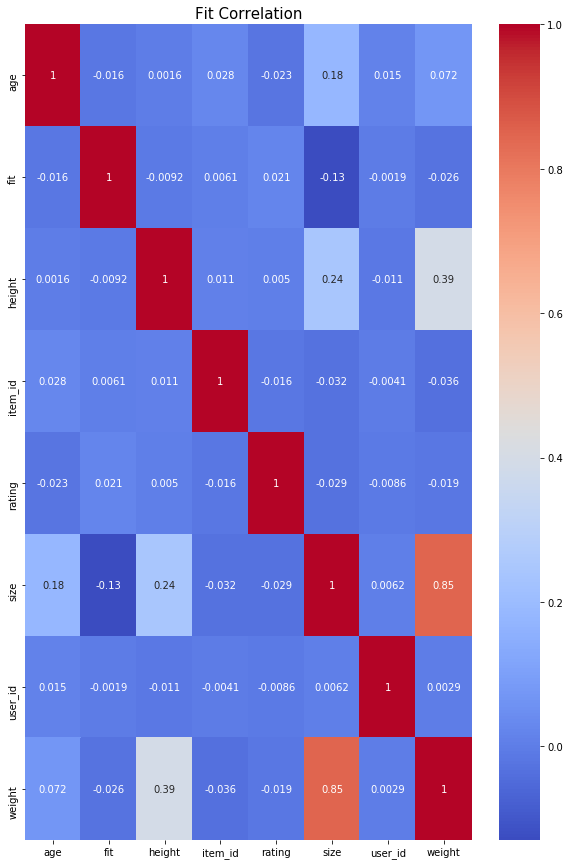

In [19]:
#Heatmap 

plt.figure(figsize= (10,15))
sns.heatmap(sample_df.corr(), annot = True, cmap = 'coolwarm');
plt.title("Fit Correlation", size =15);

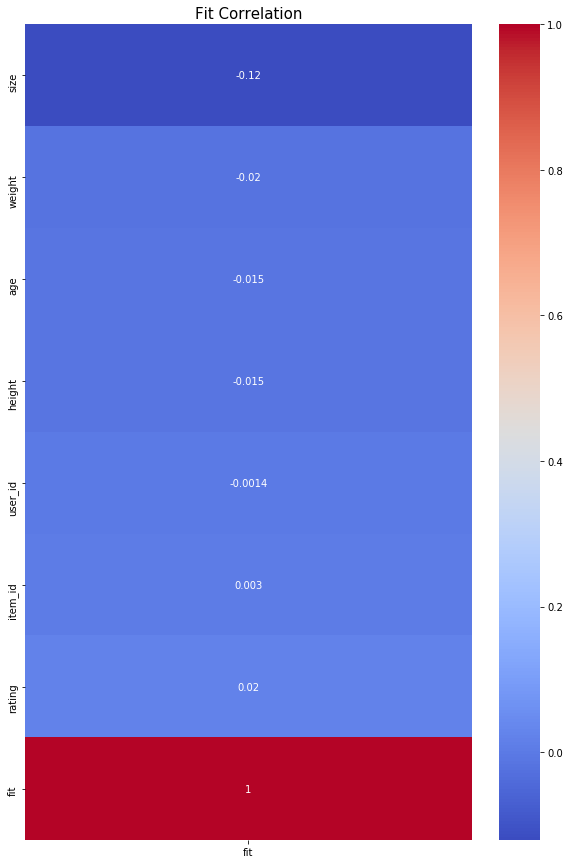

In [20]:
#Heatmap - Fit correlation

plt.figure(figsize= (10,15))
sns.heatmap(df.corr()[['fit']].sort_values('fit'), annot = True, cmap = 'coolwarm');
plt.title("Fit Correlation", size =15);

#Interesting how size and weight have negative correlations with fit 

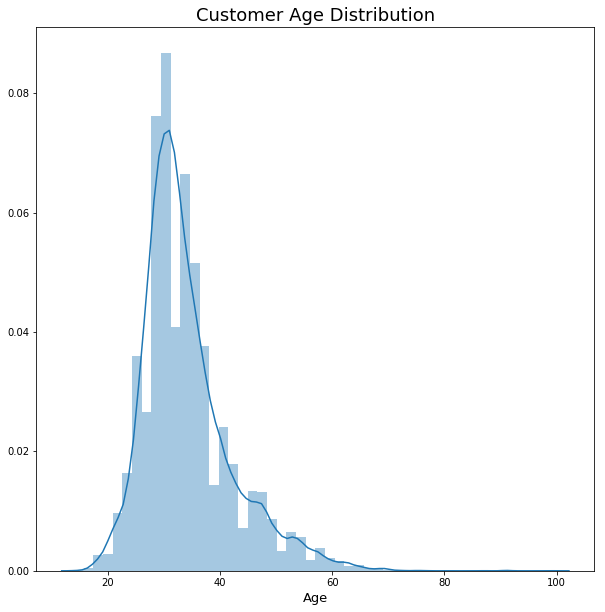

In [21]:
#Customer Age Distribution  

plt.figure(figsize=(10,10))
ax = sns.distplot(df['age']);
ax.set_title('Customer Age Distribution', size = 18)
ax.set_xlabel('Age', size = 13);

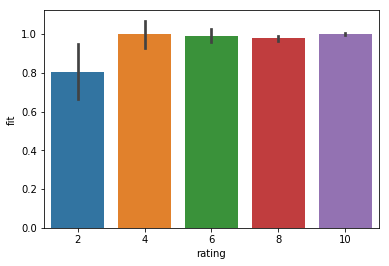

In [22]:
#Scatter plot of ratings and fit
sns.barplot(x='rating', y='fit', data= sample_df);

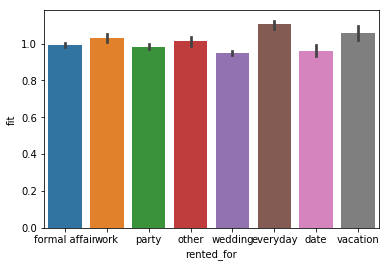

In [23]:
#Scatter plot of occasion and fit
sns.barplot(x='rented_for', y='fit', data= sample_df);

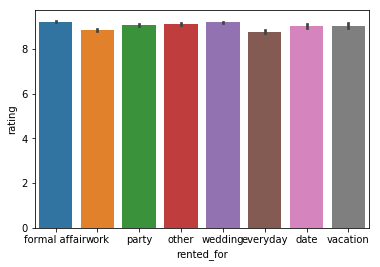

In [24]:
#Scatter plot of occasion and ratings 
sns.barplot(x='rented_for', y='rating', data= sample_df);

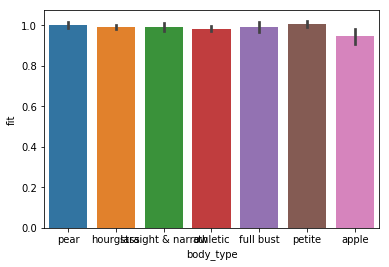

In [25]:
#Scatter plot of body type and fit 
sns.barplot(x='body_type', y='fit', data= sample_df);

# Dummies 

In [26]:
#Dummy the categorical columns 
sample_df = pd.get_dummies(data=sample_df, columns=['body_type','rented_for','category'])

In [27]:
sample_df = sample_df.rename(columns={'body_type_straight & narrow': 'body_type_straight_narrow',
                                      'body_type_full bust': 'body_type_full_bust',
                                      'category_t-shirt': 'category_t_shirt', 
                                      'rented_for_formal affair': 'rented_for_formal_affair'})

In [28]:
sample_df.columns

Index(['age', 'bust_size', 'fit', 'height', 'item_id', 'rating', 'review_date',
       'review_summary', 'review_text', 'size', 'user_id', 'weight',
       'body_type_apple', 'body_type_athletic', 'body_type_full_bust',
       'body_type_hourglass', 'body_type_pear', 'body_type_petite',
       'body_type_straight_narrow', 'rented_for_date', 'rented_for_everyday',
       'rented_for_formal_affair', 'rented_for_other', 'rented_for_party',
       'rented_for_vacation', 'rented_for_wedding', 'rented_for_work',
       'category_blazer', 'category_blouse', 'category_bomber',
       'category_cami', 'category_cape', 'category_cardigan', 'category_coat',
       'category_crewneck', 'category_culottes', 'category_down',
       'category_dress', 'category_duster', 'category_frock', 'category_gown',
       'category_henley', 'category_hoodie', 'category_jacket',
       'category_jogger', 'category_jumpsuit', 'category_kaftan',
       'category_kimono', 'category_knit', 'category_leggings',
      

In [29]:
sample_df.to_csv('./rent_the_runway_cleaned_with_dummies.csv', index = False)

More EDA with the Dummy columns 

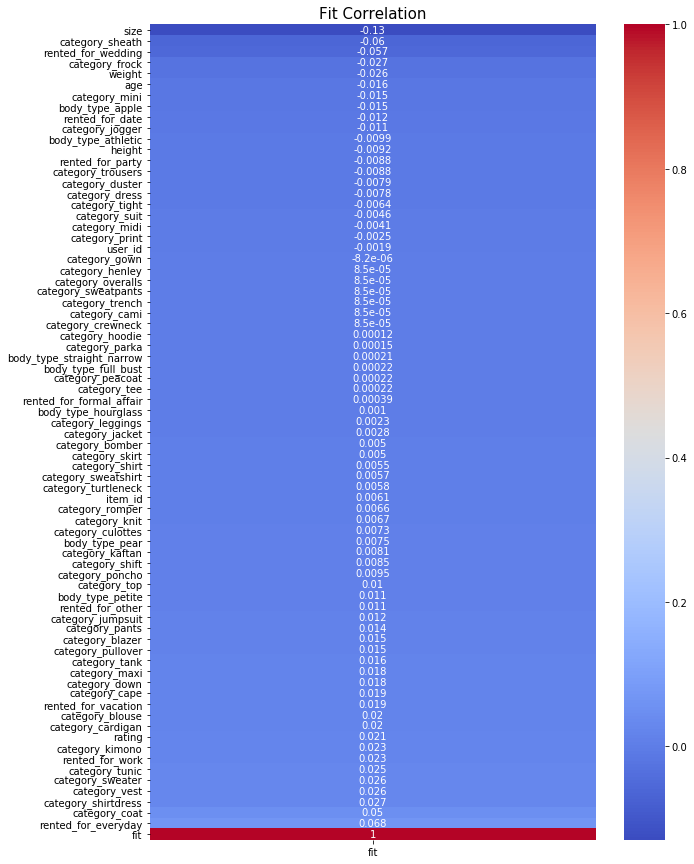

In [30]:
#Heatmap - Fit correlation

plt.figure(figsize= (10,15))
sns.heatmap(sample_df.corr()[['fit']].sort_values('fit'), annot = True, cmap = 'coolwarm');
plt.title("Fit Correlation", size =15);

#Very little correlation between fit and the categorical columns

# EDA with Widgets 

In [31]:
# https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6

In [32]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [33]:
@interact
def show_articles_more_than(column=['size', 'rating', 'age', 'weight'], 
                            x=(0, 100)):
    return df.loc[df[column] > x]

interactive(children=(Dropdown(description='column', options=('size', 'rating', 'age', 'weight'), value='size'…

In [34]:
#Correlation between features 
@interact 
def correlations(column1 = list(df.select_dtypes('number').columns),
                 column2 = list(df.select_dtypes('number').columns)):
    print(f"Correlation: {df[column1].corr(df[column2])}")

interactive(children=(Dropdown(description='column1', options=('age', 'fit', 'height', 'item_id', 'rating', 's…

In [35]:
import cufflinks as cf

@interact_manual
def scatter_plot(x=list(sample_df.select_dtypes('number').columns), 
                 y=list(sample_df.select_dtypes('number').columns)[1:],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    sample_df.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), 
#              text='title',
#              title=f'{y.title()} vs {x.title()}',
            theme=theme, colorscale=colorscale)

interactive(children=(Dropdown(description='x', options=('age', 'fit', 'height', 'item_id', 'rating', 'size', …